<a href="https://colab.research.google.com/github/ImpossiblePixie/FreeCodeCamp-Pandas-Real-Life-Example/blob/master/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
netflix_data = pd.read_csv("/content/8. Netflix Dataset.csv")
netflix_data

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [ ]:
netflix_data.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [ ]:
len(netflix_data.columns)

11

In [ ]:
netflix_data.shape

(7789, 11)

In [ ]:
netflix_data.describe()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
count,7789,7789,7789,5401,7071,7282,7779,7782,7789,7789,7789
unique,7787,2,7787,4050,6831,681,1565,14,216,492,7769
top,s6621,Movie,Backfire,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,2,5379,2,18,18,2556,118,2865,1608,334,3


In [ ]:
netflix_data.size

85679

In [ ]:
netflix_data['Country'].value_counts()

United States                                    2556
India                                             923
United Kingdom                                    397
Japan                                             226
South Korea                                       183
                                                 ... 
United Kingdom, Spain                               1
United States, France, Canada, Lebanon, Qatar       1
Sweden, United Kingdom, Finland                     1
China, United Kingdom                               1
Georgia                                             1
Name: Country, Length: 681, dtype: int64

##Task. 1) Is there any Duplicate Record in this dataset ? If yes, then remove the duplicate records.


In [ ]:
netflix_data[netflix_data.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [ ]:
netflix_data[netflix_data['Title'] == 'Backfire']

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
683,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...


In [ ]:
netflix_data.drop_duplicates(inplace= True, keep='last')

In [ ]:
netflix_data.shape

(7787, 11)

##Task. 2) Is there any Null Value present in any column ? Show with Heat-map.


In [ ]:
netflix_data.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

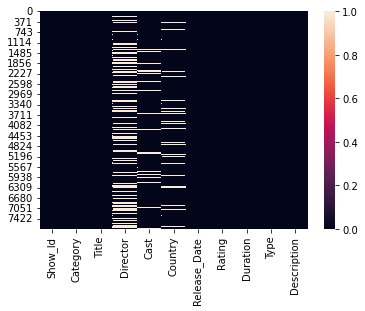

In [ ]:
import seaborn as sns

sns.heatmap(netflix_data.isnull())  #displaying null values using heatmap

Q. 1) For 'House of Cards', what is the Show Id and Who is the Director of this show ?
We can follow any of the below 3 methods

In [ ]:
netflix_data[netflix_data['Title'] == 'House of Cards']

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


In [ ]:
netflix_data[netflix_data['Title'].isin(['House of Cards'])]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


In [ ]:
netflix_data[netflix_data['Title'].str.contains('House of Cards')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


Q. 2) In which year the highest number of the TV Shows & Movies were released ? Show with Bar Graph.

In [ ]:
netflix_data['New_date'] = pd.to_datetime(netflix_data['Release_Date'])

In [ ]:
movies_by_years = netflix_data['New_date'].dt.year.value_counts()
movies_by_years

2019.0    2153
2020.0    2009
2018.0    1685
2017.0    1225
2016.0     443
2021.0     117
2015.0      88
2014.0      25
2011.0      13
2013.0      11
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: New_date, dtype: int64

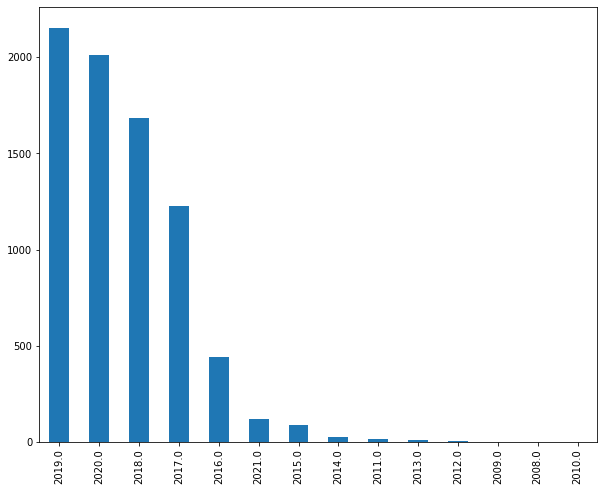

In [ ]:
movies_by_years.plot(kind='bar', figsize=(10, 8))

##Q. 3) How many Movies & TV Shows are in the dataset ? Show with Bar Graph.

In [ ]:
netflix_data.groupby('Category').count()

,Show_Id,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,New_date
Category,,,,,,,,,,,
Movie,5377,5377,5214,4951,5147,5377,5372,5377,5377,5377,5377
TV Show,2410,2410,185,2118,2133,2400,2408,2410,2410,2410,2400


In [ ]:
movie_TV_show_counts = netflix_data.groupby('Category').Category.count()
movie_TV_show_counts

Category
Movie      5377
TV Show    2410
Name: Category, dtype: int64

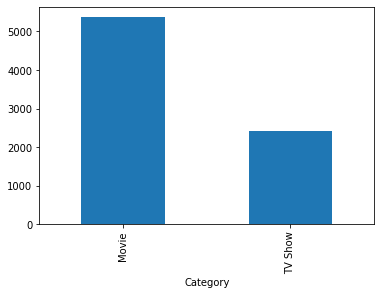

In [ ]:
movie_TV_show_counts.plot(kind= 'bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


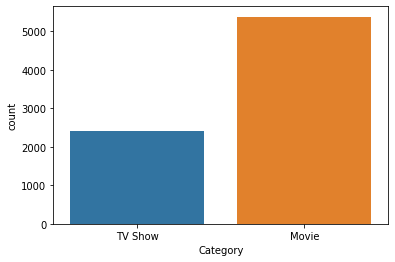

In [ ]:
sns.countplot(netflix_data['Category']) 

##Q. 4) Show all the Movies that were released in year 2000.

In [ ]:
netflix_data['Year'] = netflix_data['New_date'].dt.year

In [ ]:
netflix_data.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,New_date,Year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020.0
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020.0


In [ ]:
#check the movies released in the year 2000.

netflix_data[ (netflix_data['Year'] == 2000) & (netflix_data['Category'] == 'Movie') ]   # no movie was released in 2000

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,New_date,Year


#1255 movies were released in the year 2018

In [ ]:
netflix_data[ (netflix_data['Year'] == 2018) & (netflix_data['Category'] == 'Movie') ] 

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,New_date,Year
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018.0
17,s18,Movie,22-Jul,Paul Greengrass,"Anders Danielsen Lie, Jon Øigarden, Jonas Stra...","Norway, Iceland, United States","October 10, 2018",R,144 min,"Dramas, Thrillers","After devastating terror attacks in Norway, a ...",2018-10-10,2018.0
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,"May 16, 2018",TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",2018-05-16,2018.0
20,s21,Movie,​​Kuch Bheege Alfaaz,Onir,"Geetanjali Thapa, Zain Khan Durrani, Shray Rai...",India,"September 1, 2018",TV-14,110 min,"Dramas, Independent Movies, International Movies",After accidentally connecting over the Interne...,2018-09-01,2018.0
21,s22,Movie,​Goli Soda 2,Vijay Milton,"Samuthirakani, Bharath Seeni, Vinoth, Esakki B...",India,"September 15, 2018",TV-14,128 min,"Action & Adventure, Dramas, International Movies","A taxi driver, a gangster and an athlete strug...",2018-09-15,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7765,s7764,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...,2018-02-15,2018.0
7770,s7769,Movie,Zindagi Kitni Haseen Hay,Anjum Shahzad,"Feroze Khan, Sajal Ali, Jibrayl Ahmed Rajput, ...",Pakistan,"October 1, 2018",TV-14,126 min,"Dramas, International Movies, Romantic Movies",Two young parents struggle to keep their marri...,2018-10-01,2018.0
7773,s7772,Movie,Zion,Floyd Russ,Zion Clark,United States,"August 10, 2018",TV-PG,12 min,"Documentaries, Sports Movies",Born without legs and stuck in foster care for...,2018-08-10,2018.0
7778,s7777,Movie,Zokkomon,Satyajit Bhatkal,"Darsheel Safary, Anupam Kher, Manjari Fadnis, ...",India,"November 1, 2018",PG,104 min,"Children & Family Movies, Dramas","When his cruel uncle abandons him, a young orp...",2018-11-01,2018.0


##Q. 5) Show only the Titles of all TV Shows that were released in India only.

In [ ]:
#this will display all columns
netflix_data[ (netflix_data['Category'] == 'TV Show') & (netflix_data['Country'] == 'India') ] 

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,New_date,Year
86,s87,TV Show,21 Sarfarosh: Saragarhi 1897,NaN,"Luke Kenny, Mohit Raina, Mukul Dev",India,"December 1, 2018",TV-14,1 Season,"International TV Shows, TV Dramas","In one of history's greatest last stands, a ba...",2018-12-01,2018.0
132,s133,TV Show,7 (Seven),Nizar Shafi,"Rahman, Havish, Regina Cassandra, Nandita Swet...",India,"July 30, 2019",TV-14,1 Season,TV Shows,Multiple women report their husbands as missin...,2019-07-30,2019.0
340,s341,TV Show,Agent Raghav,NaN,"Sharad Kelkar, Aahana Kumra, Mahesh Manjrekar,...",India,"April 15, 2017",TV-14,1 Season,"Crime TV Shows, International TV Shows, TV Act...","A mix of brilliance, erudition and skill enabl...",2017-04-15,2017.0
364,s365,TV Show,Akbar Birbal,NaN,"Kiku Sharda, Vishal Kotian, Delnaaz Irani",India,"March 31, 2020",TV-G,1 Season,"Kids' TV, TV Comedies, TV Dramas","From battles of wit to fights for justice, Emp...",2020-03-31,2020.0
533,s534,TV Show,Anjaan: Rural Myths,NaN,NaN,India,"December 15, 2018",TV-14,1 Season,"International TV Shows, TV Horror, TV Thrillers",Spine-chilling stories of malevolent spirits u...,2018-12-15,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6249,s6249,TV Show,The Creative Indians,NaN,NaN,India,"August 24, 2020",TV-MA,2 Seasons,"Docuseries, International TV Shows",From chefs and comedians to filmmakers and fas...,2020-08-24,2020.0
6400,s6399,TV Show,The Golden Years with Javed Akhtar,NaN,NaN,India,"June 1, 2017",TV-G,1 Season,"Docuseries, International TV Shows","Writer, poet and lyricist Javed Akhtar hosts t...",2017-06-01,2017.0
6469,s6468,TV Show,The House That Made Me,NaN,Vinay Pathak,India,"March 31, 2017",TV-PG,3 Seasons,"International TV Shows, Reality TV","With host Vinay Pathak, Indian celebrities ret...",2017-03-31,2017.0
7294,s7293,TV Show,Typewriter,NaN,"Aarna Sharma, Aaryansh Malviya, Mikail Gandhi,...",India,"July 19, 2019",TV-MA,1 Season,"International TV Shows, TV Horror, TV Mysteries",Three young friends in Goa plan to search an o...,2019-07-19,2019.0


In [ ]:
#this will display only Title column
netflix_data['Title'][ (netflix_data['Category'] == 'TV Show') & (netflix_data['Country'] == 'India') ] 

86            21 Sarfarosh: Saragarhi 1897
132                              7 (Seven)
340                           Agent Raghav
364                           Akbar Birbal
533                    Anjaan: Rural Myths
                       ...                
6249                  The Creative Indians
6400    The Golden Years with Javed Akhtar
6469                The House That Made Me
7294                            Typewriter
7705                       Yeh Meri Family
Name: Title, Length: 71, dtype: object

##Q. 6) Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix ?

In [ ]:
Director_counts = netflix_data['Director'].value_counts()

In [ ]:
Director_counts.head(10)

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Jay Chapman               12
Youssef Chahine           12
Steven Spielberg          10
David Dhawan               9
Hakan Algül                8
Name: Director, dtype: int64

##Q. 7) Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom".

In [ ]:
netflix_data[ (netflix_data['Category'] == 'Movie') & (netflix_data['Type'] == 'Comedies') | (netflix_data['Country'] == 'United Kingdom') ]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,New_date,Year
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,"May 16, 2018",TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",2018-05-16,2018.0
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017-09-08,2017.0
58,s59,TV Show,100% Hotter,NaN,"Daniel Palmer, Melissa Sophia, Karen Williams,...",United Kingdom,"November 1, 2019",TV-14,1 Season,"British TV Shows, International TV Shows, Real...","A stylist, a hair designer and a makeup artist...",2019-11-01,2019.0
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,"January 1, 2021",PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",2021-01-01,2021.0
82,s83,Movie,2036 Origin Unknown,Hasraf Dulull,"Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...",United Kingdom,"December 20, 2018",TV-14,95 min,Sci-Fi & Fantasy,Working with an artificial intelligence to inv...,2018-12-20,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7670,s7669,TV Show,World War II in Colour,NaN,Robert Powell,United Kingdom,"August 1, 2017",TV-MA,1 Season,"British TV Shows, Docuseries, International TV...",Footage of the most dramatic moments from Worl...,2017-08-01,2017.0
7671,s7670,TV Show,World's Busiest Cities,NaN,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,"February 1, 2019",TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali...",2019-02-01,2019.0
7688,s7687,Movie,XV: Beyond the Tryline,Pierre Deschamps,NaN,United Kingdom,"March 18, 2020",TV-14,91 min,"Documentaries, Sports Movies","Set against the 2015 Rugby World Cup, this doc...",2020-03-18,2020.0
7725,s7724,Movie,You Can Tutu,James Brown,"Lily O'Regan, Jeannettsy Enriquez Borges, Joel...",United Kingdom,"December 31, 2017",TV-G,87 min,Children & Family Movies,A gifted young ballet dancer struggles to find...,2017-12-31,2017.0


##Q. 8) In how many movies/shows, Tom Cruise was cast ?
Ans : In 2 movie Tom Crise was casted

In [ ]:
netflix_data[netflix_data['Cast'] == 'Tom Cruise']    # it is showing as zero as there are other actors as well in the cast column.

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,New_date,Year


In [ ]:
netflix_data[netflix_data['Cast'].isin(['Tom Cruise'])] 

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,New_date,Year


In [ ]:
netflix_data[netflix_data['Cast'].str.contains('Tom Cruise')]  # we need to drop nulls before checking it using string contains method

ValueError: ignored

In [ ]:
dropped_data = netflix_data.dropna()

In [ ]:
dropped_data[dropped_data['Cast'].str.contains('Tom Cruise')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,New_date,Year
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,"January 1, 2020",R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020-01-01,2020.0
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"July 1, 2019",R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019-07-01,2019.0


Q. 9) What are the different Ratings defined by Netflix ?

In [ ]:
netflix_data['Rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
netflix_data['Rating'].nunique()

14

##Q. 9.1) How many Movies got the 'TV-14' rating, in Canada ?
Ans: 23
##Q. 9.2) How many TV Shows got the 'R' rating, after year 2018 ?
Ans: 1

In [ ]:
Canada_TV14 = netflix_data['Category'][ (netflix_data['Rating'] == 'TV-14') & (netflix_data['Country'] == 'Canada') & (netflix_data['Category'] == 'Movie')]

In [ ]:
len(Canada_TV14)

11

In [ ]:
netflix_data.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,New_date,Year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020.0
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0


In [ ]:
netflix_data[(netflix_data['Category'] == 'TV Show') & (netflix_data['Rating'] == 'R') & (netflix_data['Year'] > 2018)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,New_date,Year
6437,s6436,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",NaN,"April 25, 2019",R,1 Season,TV Shows,Trapped at a stagecoach stop as a storm rages ...,2019-04-25,2019.0


##Q. 10) What is the maximum duration of a Movie/Show on Netflix ?

In [ ]:
netflix_data['Duration'].unique() 

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '84 min', '99 min',
       '90 min', '102 min', '104 min', '105 min', '56 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '109 min', '44 min',
       '75 min', '101 min', '3 Seasons', '37 min', '113 min', '114 min',
       '130 min', '94 min', '140 min', '135 min', '82 min', '70 min',
       '121 min', '92 min', '164 min', '53 min', '83 min', '116 min',
       '86 min', '120 min', '96 min', '126 min', '129 min', '77 min',
       '137 min', '148 min', '28 min', '122 min', '176 min', '85 min',
       '22 min', '68 min', '111 min', '29 min', '142 min', '168 min',
       '21 min', '59 min', '20 min', '98 min', '108 min', '76 min',
       '26 min', '156 min', '30 min', '57 min', '150 min', '133 min',
       '1

In [ ]:
netflix_data.Duration.dtypes

dtype('O')

In [ ]:
data_without_seasons =  netflix_data[~netflix_data.Duration.str.contains("Season")]

In [ ]:
data_without_seasons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5377 entries, 1 to 7788
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       5377 non-null   object        
 1   Category      5377 non-null   object        
 2   Title         5377 non-null   object        
 3   Director      5214 non-null   object        
 4   Cast          4951 non-null   object        
 5   Country       5147 non-null   object        
 6   Release_Date  5377 non-null   object        
 7   Rating        5372 non-null   object        
 8   Duration      5377 non-null   object        
 9   Type          5377 non-null   object        
 10  Description   5377 non-null   object        
 11  New_date      5377 non-null   datetime64[ns]
 12  Year          5377 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 588.1+ KB


In [ ]:
data_without_seasons.loc['Duration'] = data_without_seasons['Duration'].astype('str')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
data_without_seasons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5378 entries, 1 to Duration
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       5377 non-null   object        
 1   Category      5377 non-null   object        
 2   Title         5377 non-null   object        
 3   Director      5214 non-null   object        
 4   Cast          4951 non-null   object        
 5   Country       5147 non-null   object        
 6   Release_Date  5377 non-null   object        
 7   Rating        5372 non-null   object        
 8   Duration      5377 non-null   object        
 9   Type          5377 non-null   object        
 10  Description   5377 non-null   object        
 11  New_date      5377 non-null   datetime64[ns]
 12  Year          5377 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 588.2+ KB


In [ ]:
data_without_seasons[['Mins','Units']] = data_without_seasons["Duration"].str.split(" ", expand = True)  #split the string in duration in minutes and units

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
data_without_seasons.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,New_date,Year,Mins,Units
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0,93,min
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018.0,78,min
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,2017.0,80,min
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020.0,123,min
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020-06-01,2020.0,95,min


In [ ]:
data_without_seasons.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_without_seasons.dtypes

Show_Id                 object
Category                object
Title                   object
Director                object
Cast                    object
Country                 object
Release_Date            object
Rating                  object
Duration                object
Type                    object
Description             object
New_date        datetime64[ns]
Year                   float64
Mins                    object
Units                   object
dtype: object

In [ ]:
data_without_seasons['Mins'] = data_without_seasons.Mins.astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_without_seasons.dtypes

Show_Id                 object
Category                object
Title                   object
Director                object
Cast                    object
Country                 object
Release_Date            object
Rating                  object
Duration                object
Type                    object
Description             object
New_date        datetime64[ns]
Year                   float64
Mins                     int64
Units                   object
dtype: object

In [ ]:
data_without_seasons['Mins'].max()

253

In [ ]:
data_without_seasons.sort_values('Mins', ascending=False)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,New_date,Year,Mins,Units
6852,s6851,Movie,The School of Mischief,Houssam El-Din Mustafa,"Suhair El-Babili, Adel Emam, Saeed Saleh, Youn...",Egypt,"May 21, 2020",TV-14,253 min,"Comedies, Dramas, International Movies",A high school teacher volunteers to transform ...,2020-05-21,2020.0,253,min
4490,s4491,Movie,No Longer kids,Samir Al Asfory,"Said Saleh, Hassan Moustafa, Ahmed Zaki, Youne...",Egypt,"May 21, 2020",TV-14,237 min,"Comedies, Dramas, International Movies",Hoping to prevent their father from skipping t...,2020-05-21,2020.0,237,min
5377,s5377,Movie,Sangam,Raj Kapoor,"Raj Kapoor, Vyjayanthimala, Rajendra Kumar, La...",India,"December 31, 2019",TV-14,228 min,"Classic Movies, Dramas, International Movies",Returning home from war after being assumed de...,2019-12-31,2019.0,228,min
3521,s3522,Movie,Lagaan,Ashutosh Gowariker,"Aamir Khan, Gracy Singh, Rachel Shelley, Paul ...",India,"January 10, 2021",PG,224 min,"Dramas, International Movies, Music & Musicals","In 1890s India, an arrogant British commander ...",2021-01-10,2021.0,224,min
3195,s3196,Movie,Jodhaa Akbar,Ashutosh Gowariker,"Hrithik Roshan, Aishwarya Rai Bachchan, Sonu S...",India,"October 1, 2018",TV-14,214 min,"Action & Adventure, Dramas, International Movies","In 16th-century India, what begins as a strate...",2018-10-01,2018.0,214,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,s528,Movie,ANIMA,Paul Thomas Anderson,Thom Yorke,United Kingdom,"June 27, 2019",TV-PG,15 min,"Dramas, Independent Movies, Music & Musicals",In a short musical film directed by Paul Thoma...,2019-06-27,2019.0,15,min
1128,s1129,Movie,Buddy Thunderstruck: The Maybe Pile,Harry Chaskin,"Brian Atkinson, Ted Raimi, Harry Chaskin, Debi...",United States,"July 14, 2017",TV-Y7,14 min,Movies,Champion truck-racing dog Buddy and his best f...,2017-07-14,2017.0,14,min
7773,s7772,Movie,Zion,Floyd Russ,Zion Clark,United States,"August 10, 2018",TV-PG,12 min,"Documentaries, Sports Movies",Born without legs and stuck in foster care for...,2018-08-10,2018.0,12,min
1504,s1505,Movie,Cosmos Laundromat: First Cycle,Mathieu Auvray,"Pierre Bokma, Reinout Scholten van Aschat",Netherlands,"June 4, 2019",TV-MA,12 min,"Dramas, International Movies, Sci-Fi & Fantasy","Despondent on a desolate island, a suicidal sh...",2019-06-04,2019.0,12,min


##Q. 11) Which individual country has the Highest No. of TV Shows ?

In [ ]:
country_TV_show = netflix_data [(netflix_data['Category'] == 'TV Show')  ]
country_TV_show.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,New_date,Year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020.0
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017-07-01,2017.0
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",2018-11-30,2018.0
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,"May 17, 2019",TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,2019-05-17,2019.0
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",2019-03-20,2019.0


In [ ]:
country_TV_show.Country.value_counts().head(1)

United States    705
Name: Country, dtype: int64

In [ ]:
len(country_TV_show[country_TV_show['Country'] == 'India'])

71

##Q. 12) How can we sort the dataset by Year ?

In [ ]:
netflix_data.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,New_date,Year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020.0
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020.0


In [ ]:
netflix_data.sort_values(by= 'Year', ascending=False)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,New_date,Year
7353,s7352,Movie,Unknown,Jaume Collet-Serra,"Liam Neeson, Diane Kruger, January Jones, Aida...","United Kingdom, Germany, France, United States","January 1, 2021",PG-13,113 min,"Action & Adventure, Thrillers",Liam Neeson stars as a man who regains conscio...,2021-01-01,2021.0
2013,s2014,Movie,Enter the Dragon,Robert Clouse,"Bruce Lee, John Saxon, Jim Kelly, Ahna Capri, ...","Hong Kong, United States","January 1, 2021",R,103 min,"Action & Adventure, Classic Movies","Recruited by a British agent, Shaolin master L...",2021-01-01,2021.0
2349,s2350,Movie,Gangaajal,Prakash Jha,"Ajay Devgn, Gracy Singh, Mohan Agashe, Mohan J...",India,"January 8, 2021",TV-MA,148 min,"Dramas, International Movies","Posted to a small, crime-ridden town, a cop so...",2021-01-08,2021.0
1497,s1498,Movie,Cool Hand Luke,Stuart Rosenberg,"Paul Newman, George Kennedy, J.D. Cannon, Lou ...",United States,"January 1, 2021",TV-14,127 min,"Classic Movies, Dramas","Luke Jackson likes to do things his own way, w...",2021-01-01,2021.0
1194,s1195,Movie,Can't Hardly Wait,"Harry Elfont, Deborah Kaplan","Jennifer Love Hewitt, Ethan Embry, Charlie Kor...",United States,"January 1, 2021",PG-13,101 min,"Comedies, Romantic Movies","At a wild high school graduation party, aspiri...",2021-01-01,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374,s3375,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,NaT,NaN
3492,s3493,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",NaT,NaN
3946,s3947,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",NaT,NaN
5138,s5138,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",NaT,NaN


##Q. 13) Find all the instances where: Category is 'Movie' and Type is 'Dramas' or Category is 'TV Show' & Type is 'Kids' TV'.

In [ ]:
movie_dramas = dropped_data[(dropped_data['Category']== 'Movie') & (dropped_data['Type'].str.contains("Dramas") )] 
movie_dramas.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,New_date,Year
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020.0
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",R,119 min,Dramas,After one of his high school students attacks ...,2019-11-01,2019.0
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,"October 20, 2017",TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...,2017-10-20,2017.0
15,s16,Movie,Oct-01,Kunle Afolayan,"Sadiq Daba, David Bailie, Kayode Olaiya, Kehin...",Nigeria,"September 1, 2019",TV-14,149 min,"Dramas, International Movies, Thrillers",Against the backdrop of Nigeria's looming inde...,2019-09-01,2019.0


In [ ]:
TV_show_kids = dropped_data[(dropped_data['Category'] == 'TV Show') & (dropped_data['Type'].str.contains("Kids' TV"))]   
TV_show_kids.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,New_date,Year
276,s277,TV Show,Abby Hatcher,Kyran Kelly,"Macy Drouin, Wyatt White, Paul Sun-Hyung Lee, ...","United States, Canada","July 1, 2020",TV-Y,1 Season,Kids' TV,A big-hearted girl helps her Fuzzly friends wh...,2020-07-01,2020.0
2380,s2381,TV Show,Geronimo Stilton,Guy Vasilovich,"Brian Drummond, Erin Mathews, Richard Ian Cox,...","Italy, Canada, France","December 31, 2017",TV-Y,1 Season,"Kids' TV, TV Comedies",With the help of brainy and adventurous sideki...,2017-12-31,2017.0
2439,s2440,TV Show,Glitter Force Doki Doki,Go Koga,"Debi Derryberry, Cassandra Morris, Melissa Fah...",Japan,"November 10, 2017",TV-Y7,2 Seasons,"Anime Series, Kids' TV",Four girls summon their inner superheroes to d...,2017-11-10,2017.0
3238,s3239,TV Show,Julie and the Phantoms,Kenny Ortega,"Madison Reyes, Charlie Gillespie, Owen Patrick...",United States,"September 10, 2020",TV-G,1 Season,"Kids' TV, TV Comedies",Julie lost her passion for music when she lost...,2020-09-10,2020.0
3582,s3583,TV Show,Lego Friends: Girls on a Mission,"Andrew Tan, Stephen Murray","Jasmine St. Clair, Allegra Clark, Rosamund Mar...",Denmark,"February 1, 2019",TV-Y,1 Season,Kids' TV,"Five best friends put their teamwork, wits and...",2019-02-01,2019.0


In [ ]:
dropped_data[(dropped_data['Category'] == 'TV Show') & (dropped_data['Type'].str.contains("Kids' TV")) |  (dropped_data['Category']== 'Movie') & (dropped_data['Type'].str.contains("Dramas") )]   

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,New_date,Year
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020.0
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",R,119 min,Dramas,After one of his high school students attacks ...,2019-11-01,2019.0
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,"October 20, 2017",TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...,2017-10-20,2017.0
15,s16,Movie,Oct-01,Kunle Afolayan,"Sadiq Daba, David Bailie, Kayode Olaiya, Kehin...",Nigeria,"September 1, 2019",TV-14,149 min,"Dramas, International Movies, Thrillers",Against the backdrop of Nigeria's looming inde...,2019-09-01,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7776,s7775,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019-11-20,2019.0
7778,s7777,Movie,Zokkomon,Satyajit Bhatkal,"Darsheel Safary, Anupam Kher, Manjari Fadnis, ...",India,"November 1, 2018",PG,104 min,"Children & Family Movies, Dramas","When his cruel uncle abandons him, a young orp...",2018-11-01,2018.0
7782,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...,2018-07-01,2018.0
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020-10-19,2020.0
